# Imports

In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [63]:
df_org = pd.read_csv("data/covid_data_original.csv")

In [64]:
df_org

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,16/08/2020,16,8,2020,120,7,Afghanistan,AF,AFG,38041757.0,Asia,2.210729
1,15/08/2020,15,8,2020,7,0,Afghanistan,AF,AFG,38041757.0,Asia,1.895286
2,14/08/2020,14,8,2020,79,9,Afghanistan,AF,AFG,38041757.0,Asia,2.318505
3,13/08/2020,13,8,2020,76,10,Afghanistan,AF,AFG,38041757.0,Asia,2.297475
4,12/08/2020,12,8,2020,215,32,Afghanistan,AF,AFG,38041757.0,Asia,2.097695
...,...,...,...,...,...,...,...,...,...,...,...,...
36607,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
36608,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
36609,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
36610,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


# Rename column "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000" to "last2weeks"

In [65]:
df_org = df_org.rename(columns={"Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "last2weeks"})

In [66]:
df_org.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,last2weeks
0,16/08/2020,16,8,2020,120,7,Afghanistan,AF,AFG,38041757.0,Asia,2.210729
1,15/08/2020,15,8,2020,7,0,Afghanistan,AF,AFG,38041757.0,Asia,1.895286
2,14/08/2020,14,8,2020,79,9,Afghanistan,AF,AFG,38041757.0,Asia,2.318505
3,13/08/2020,13,8,2020,76,10,Afghanistan,AF,AFG,38041757.0,Asia,2.297475
4,12/08/2020,12,8,2020,215,32,Afghanistan,AF,AFG,38041757.0,Asia,2.097695


# Exploring the Data  

Note: I will look at the NaN values later.

### dateRep

#### cases

In [67]:
df_org['cases'].describe()

count    36612.000000
mean       586.489949
std       3666.710242
min      -2461.000000
25%          0.000000
50%          6.000000
75%        117.000000
max      78427.000000
Name: cases, dtype: float64

We can see that we seem to have negative cases, since the minimum is at -2461.
The maximum is at 78427.


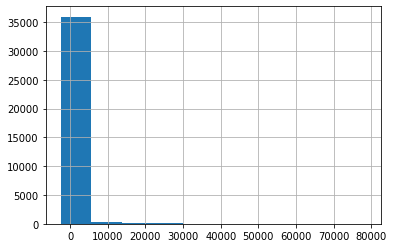

In [68]:
df_org['cases'].hist();

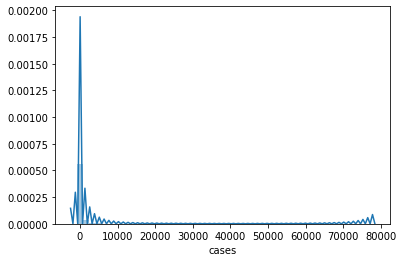

In [69]:
sns.distplot(df_org['cases']);

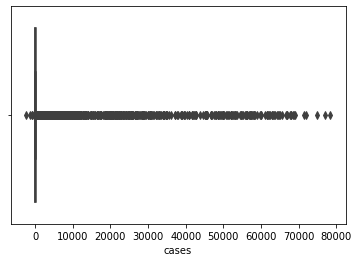

In [70]:
sns.boxplot(df_org['cases']);

We can see that we have a lot of outliers.

#### deaths

In [71]:
df_org['deaths'].describe()

count    36612.000000
mean        20.924287
std        128.715451
min      -5359.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       4928.000000
Name: deaths, dtype: float64

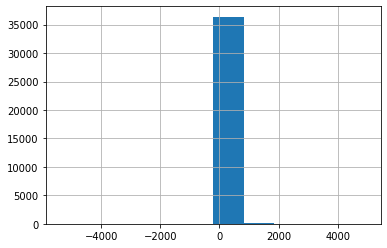

In [72]:
df_org['deaths'].hist();

Here again, we can see that we have negative cases with a minimum of -5359.   
The maximum is at 4928.

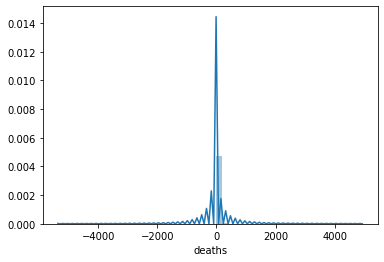

In [73]:
sns.distplot(df_org['deaths']);

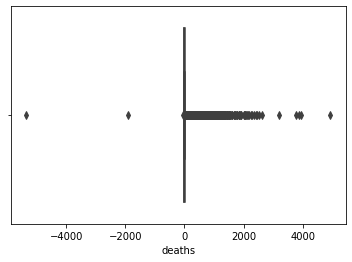

In [74]:
sns.boxplot(df_org['deaths']);

Here again, we have a lot of outliers.

#### countriesAndTerritories

In [75]:
df_org['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

#### geoId

In [76]:
df_org['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN',
       'CO', 'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD',
       'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ',
       'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME',
       'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE',
       'NG', 'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA

We can see that all geoIds (except 'JPG11668' and 'nan') are two capital letters.

Now, I want to know, wich value countriesAndTerritories has where geoId is 'JPG11668'.

In [77]:
df_org['countriesAndTerritories'][df_org['geoId'] == 'JPG11668'].unique()

array(['Cases_on_an_international_conveyance_Japan'], dtype=object)

Let's see if Cases_on_an_international_conveyance_Japan has another geoId:

In [78]:
df_org['geoId'][df_org['countriesAndTerritories'] == 'Cases_on_an_international_conveyance_Japan'].unique()

array(['JPG11668'], dtype=object)

Nope, it only has 'JPG11668' as a geoId.

For simplicicy reasons, I want change the value 'JPG11668' to 'CJ' (for "conveyance Japan").   
I choose 'CJ', since it is not in the column geoId:

In [79]:
'CJ' in df_org['geoId'].unique()

False

Let's change 'JPG11668' to 'CJ':

In [80]:
df_org['geoId'] = df_org['geoId'].replace('JPG11668', 'CJ')

Let's check, if it worked:

In [81]:
df_org['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'CJ', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK',
       'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET',
       'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH',
       'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT',
       'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG', 'LA',
       'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG',
       'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA', 'PG

In [82]:
'JPG11668' in df_org['geoId'].unique()

False

It worked!

#### countryterritoryCode

In [83]:
df_org['countryterritoryCode'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', nan, 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM',
       'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'XKX', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

We can see that every countryterritoryCode (except 'CNG1925' and nan) consists of three capital letters.

Let's see which countriesAndTerritories belongs to 'CNG1925':

In [84]:
df_org['countriesAndTerritories'][df_org['countryterritoryCode'] == 'CNG1925'].unique()

array(['Taiwan'], dtype=object)

Let's see if Taiwan has another countryterritoryCode:

In [85]:
df_org['countryterritoryCode'][df_org['countriesAndTerritories'] == 'Taiwan'].unique()

array(['CNG1925'], dtype=object)

For simplicity reasons, I want to change 'CNG1925' to 'CNG'.   
'CNG' is not in the current list of unique countryterritoryCode.

In [86]:
'CNG' in df_org['countryterritoryCode'].unique()

False

Let's replace 'CNG1925' with 'CNG':

In [87]:
df_org['countryterritoryCode'] = df_org['countryterritoryCode'].replace('CNG1925', 'CNG')

Let's check if it worked:

In [88]:
df_org['countryterritoryCode'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', nan, 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM',
       'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'XKX', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

In [89]:
'CNG1925' in df_org['countryterritoryCode'].unique()

False

It worked!

#### popData2019

In [90]:
df_org['popData2019'].describe()

count    3.654800e+04
mean     4.407129e+07
std      1.608372e+08
min      8.150000e+02
25%      1.394969e+06
50%      8.519373e+06
75%      3.036604e+07
max      1.433784e+09
Name: popData2019, dtype: float64

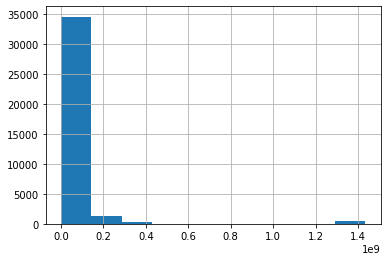

In [91]:
df_org['popData2019'].hist();

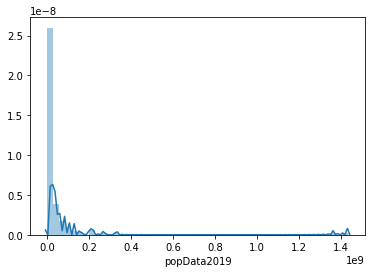

In [92]:
sns.distplot(df_org['popData2019']);

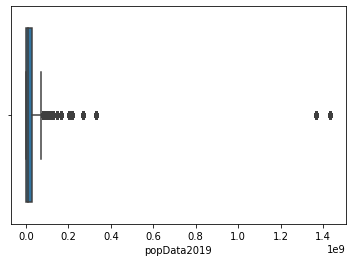

In [93]:
sns.boxplot(df_org['popData2019']);

Here again, we have a few outliers.

#### continentExp

In [94]:
df_org['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

Let's find out what countries belong to 'Other':

In [95]:
df_org['countriesAndTerritories'][df_org['continentExp'] == 'Other'].unique()

array(['Cases_on_an_international_conveyance_Japan'], dtype=object)

#### last2weeks

In [96]:
df_org['last2weeks'].describe()

count    33831.000000
mean        27.678358
std         66.627901
min         -1.262589
25%          0.239708
50%          3.544177
75%         20.461122
max        885.924117
Name: last2weeks, dtype: float64

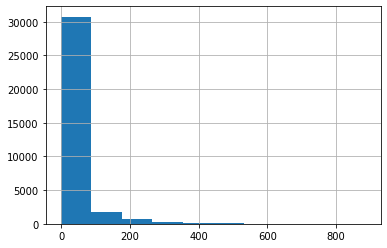

In [97]:
df_org['last2weeks'].hist();

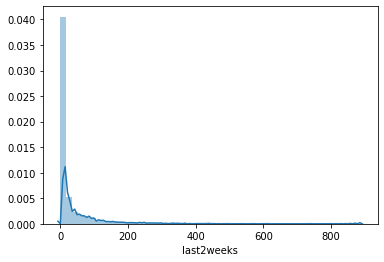

In [98]:
sns.distplot(df_org['last2weeks']);

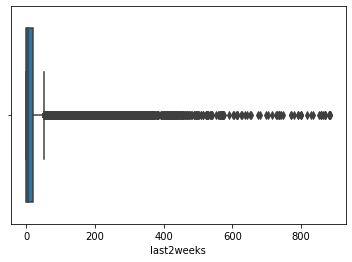

In [99]:
sns.boxplot(df_org['last2weeks']);

Here we have a lot of outliers.

# Handling NaN-Values

#### Are there any NaN values?

In [100]:
df_org.isnull().values.any()

True

#### How many NaN values are in the whole dataframe?

In [101]:
df_org.isnull().sum().sum()

3064

#### In which columns are NaN values?

In [102]:
df_org.isna().any()

dateRep                    False
day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
geoId                       True
countryterritoryCode        True
popData2019                 True
continentExp               False
last2weeks                  True
dtype: bool

In [103]:
df_org['geoId'].isnull().sum()

155

In [104]:
df_org['countryterritoryCode'].isnull().sum()

64

In [105]:
df_org['popData2019'].isnull().sum()

64

In [106]:
df_org['last2weeks'].isnull().sum()

2781

We have NaN values in 4 columns:
* 155 in geoId
* 64 in countryterritoryCode
* 64 in popData2019
* 2781 last2weeks

### Handling NaN values in the column geoId

#### Exploring geoId

In [107]:
df_org['geoId'].value_counts()

SG    230
FR    230
IT    230
BR    230
SE    230
     ... 
EH    113
TJ    108
KM    107
LS     94
CJ     64
Name: geoId, Length: 209, dtype: int64

In [108]:
df_org['countriesAndTerritories'][df_org['geoId'].isnull()].unique()

array(['Namibia'], dtype=object)

Now we know that geoId has missing values where the country is Namibia.

In [109]:
df_org[df_org['countriesAndTerritories'] == "Namibia"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,last2weeks
23431,16/08/2020,16,8,2020,181,4,Namibia,NaN,NAM,2494524.0,Africa,67.467781
23432,15/08/2020,15,8,2020,182,4,Namibia,NaN,NAM,2494524.0,Africa,64.020230
23433,14/08/2020,14,8,2020,138,5,Namibia,NaN,NAM,2494524.0,Africa,59.811010
23434,13/08/2020,13,8,2020,177,3,Namibia,NaN,NAM,2494524.0,Africa,56.924688
23435,12/08/2020,12,8,2020,128,0,Namibia,NaN,NAM,2494524.0,Africa,52.595205
...,...,...,...,...,...,...,...,...,...,...,...,...
23581,19/03/2020,19,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
23582,18/03/2020,18,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
23583,17/03/2020,17,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
23584,16/03/2020,16,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN


 We have 155 missing values in the column geoId and 155 rows where countriesAndTerritories has the value Namibia. 
 Following this, we know that no geoId is defined for Namibia. Therefore, it is save to set our own value for the geoId where countriesAndTerritories is Namibia.

#### Filling NaN values in column geoId

**Finding a suitable value to fill NaN in geoId**

We know that only rows where countriesAndTerritories has the value Namibia have NaN in geoId. Therefore, we need a value to represent Namibia.

First, we want to again see how the other geoIds look like.

In [110]:
df_org['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'CJ', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK',
       'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET',
       'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH',
       'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT',
       'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG', 'LA',
       'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG',
       'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA', 'PG

We again can see that all geoIds (except 'nan') are two capital letters.

I want to replace the NaN values with 'NA', since 'NA' is not used in geoId:

In [111]:
'NA' in df_org['geoId'].unique()

False

Let's set the NaN values to 'NA':

In [112]:
df_org['geoId'] = df_org['geoId'].fillna('NA')

Let's check, if it worked:

In [113]:
df_org['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'CJ', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK',
       'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET',
       'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH',
       'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT',
       'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG', 'LA',
       'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', 'NA', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG',
       'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA', 'P

In [114]:
df_org['geoId'].isnull().sum()

0

It worked!

# Next steps
* get rid of NaN values
* sort by dateRep to split it in train and test data later
* add feature number of cases worldwide